# Transformation Gallery

Gallery of the transformed color images

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def reshape_for_img(array, new_shape):
    return (
        array.
        reshape(new_shape).
        astype(np.uint8)
    )

def transform_img(f, img, func, outputMax=255, inputMax=255):
    img_shape = img.size[::-1] + (3,)
    
    processed_array = reshape_for_img(
        func(f, outputMax, inputMax), 
        img_shape)

    return Image.fromarray(processed_array)

Define the different transformation functions:

(numpy's functions are vectorized, which is fast for big arrays)

In [3]:
def threshold_func(f, outputMax, inputMax):
    return (f > int(255/2))*255

def negate_func(f, outputMax, inputMax):
    return 255 - f

def log_func(f, outputMax, inputMax):
    c = outputMax/np.log10(inputMax+1) 
    g = c * np.log10(1 + f)
    return g

def gamma_func(f, outputMax, inputMax):
    c = (outputMax)/(inputMax**2)
    g = c * (f**2)
    return g

We use cell magic and line magic to calculate the time: https://stackoverflow.com/a/38319381/3820738

In [4]:
%%time
img_names = ['sunset', 'flower', 'house', 'leaf']
new_images = []
for img_name in img_names:
    
    file_name = img_name + 'small.jpg'
    img = Image.open(os.path.join('images', file_name))
    f = np.array(img.getdata())
    
    # Now, we use list comprehension to apply different transformation on the existing image:
    new_images = new_images + [img] + [
        transform_img(f, img, fun) for fun in [
            log_func, negate_func, gamma_func, threshold_func]
    ]

Wall time: 1.85 s


All the results are in the `new_images` list now. For example, if we want the log transform image, we can just print the first component of the list, such as `new_images[0]`.

How to plot multiple images: https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly/46616645 (with more detailed arrangement parameters).

`tight_layout`: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.tight_layout.html

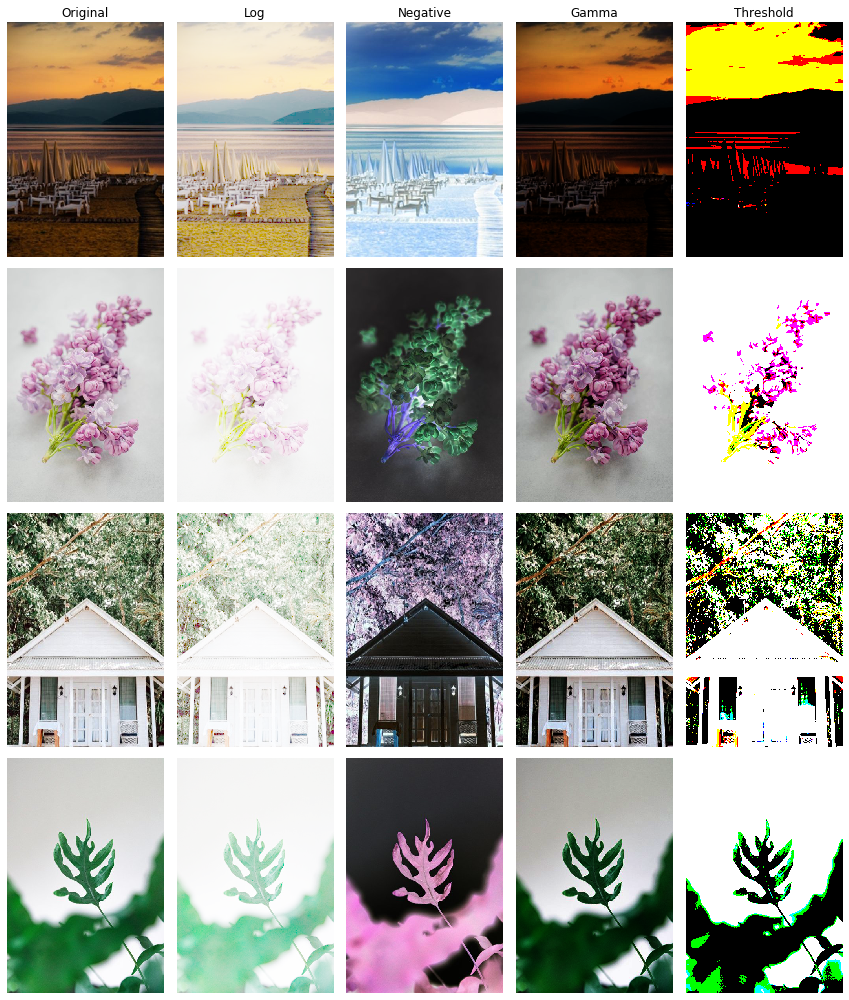

In [5]:
columns = 5
rows = len(img_names)
fig = plt.figure(figsize=(12, 14))
titles= ["Original", "Log", "Negative", "Gamma", "Threshold"]
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(new_images[i])
    plt.axis("off")
    if i<5:
        plt.title(titles[i])
fig.tight_layout()
# plt.show()
plt.savefig(os.path.join('out-images', "all-transformations.pdf"), format='pdf', dpi=300)

In [6]:
new_images = []
for img_name in img_names:
    file_name = img_name + 'small.jpg'
    img = Image.open(os.path.join('images', file_name))
    f = np.array(img.getdata())
    new_images = new_images + [img]
    
for x in [10,50,150,250]:
    def threshold_function(f, outputMax, inputMax):
        return (f > int(x/2))*255 
    img_names = ['sunset', 'flower', 'house', 'leaf']
    for img_name in img_names:
        file_name = img_name + 'small.jpg'
        img = Image.open(os.path.join('images', file_name))
        f = np.array(img.getdata())
        # Now, we use list comprehension to apply different transformation on the existing image:
        new_images = new_images + [transform_img(f, img, threshold_function)]

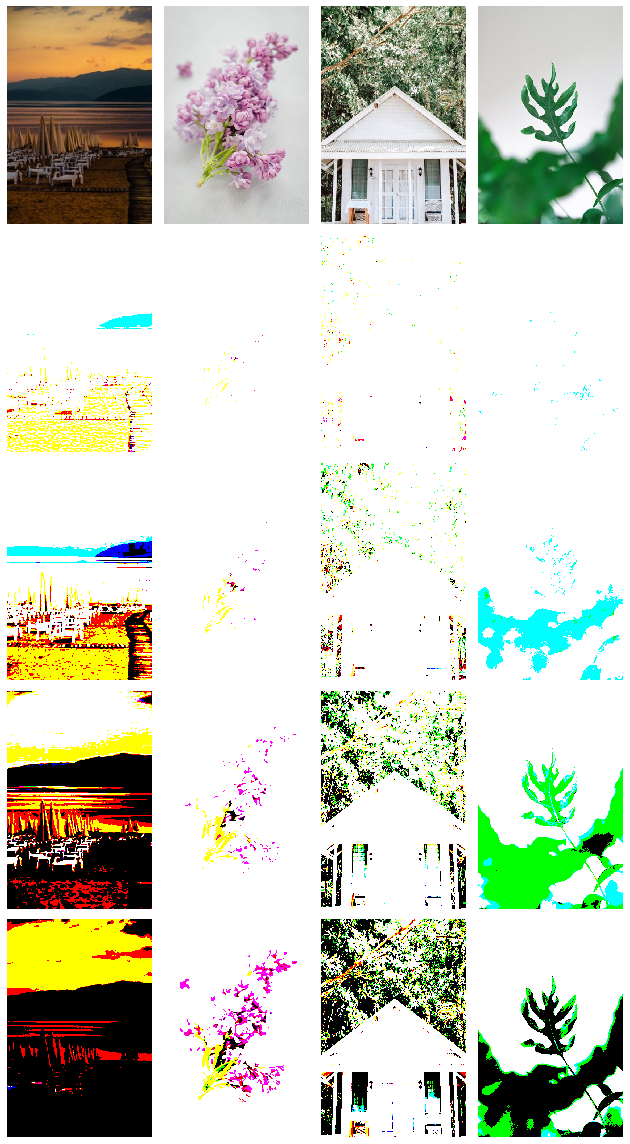

<Figure size 432x288 with 0 Axes>

In [7]:
columns = 4
rows = len(img_names)+1
fig = plt.figure(figsize=(9, 16))
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(new_images[i])
    plt.axis("off")
fig.tight_layout()
plt.show()
plt.savefig(os.path.join('out-images', "all-threshold-images.pdf"), format='pdf', dpi=300)